## Лабораторная работа №4
## Выполнили Смирнов Егор и Максимов Артем

В данной работе мы построили регрессию для 2 датасетов и поработали с параметрами для этой регрессии.

Вначале мы поработали с датасетом о работе электростанции:

In [23]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet#У всех методов есть вариант с CrossValidation - LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
ElectricityRaw = pd.read_csv('electricity.csv')
ElectricityRaw.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


LinearRegression
(0.9271761736761966, array([ 0.        , -0.87399469, -0.17018652,  0.01738785, -0.13749932]), 0.0001433037182601232) 

Ridge
alpha =  44.701184493300836 0.9273537552614651 [array([ 0.        , -0.84242055, -0.1890786 ,  0.0241295 , -0.12605113]), 0.0001524858649941709] 



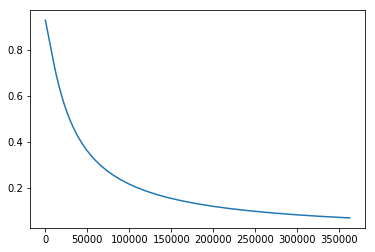

Lasso
alpha =  0.010000000000000004 0.9269877068745807 [array([ 0.        , -0.84670209, -0.17654476,  0.01600822, -0.11458545]), 0.00010539704025806078] 



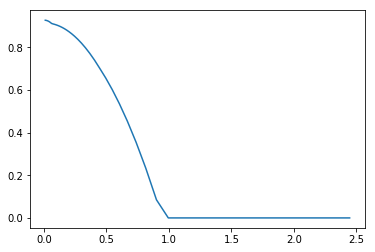

In [25]:
def analyse(DataSet, deg, ridge, lasso):
    scaler = StandardScaler(copy = False)
    scaler.fit_transform(DataSet)

    Data = DataSet[:, 0:-1]
    Predict = DataSet[:, -1]

    pol = PolynomialFeatures(degree = deg)
    Data = pol.fit_transform(Data)

    X_train, X_test, Y_train, Y_test = train_test_split(Data, Predict, test_size=0.33, random_state=42)


    def helper(model):
        model.fit(X_train, Y_train) #обучить модель
        return (model.score(X_test, Y_test), model.coef_, model.intercept_)

    def check(model, a0=None, a1=None):
        print(type(model).__name__)
        if (a0 == None):
            print(helper(model), '\n')
            return

        x = np.exp(np.arange(np.log(a0), np.log(a1), step=0.1))
        y = []
        z = []

        for a in x:
            model.__init__(a)
            t = helper(model)
            y.append(t[0])
            z.append([t[1], t[2]])
            
        imax = np.argmax(y)
        print('alpha = ', x[imax], y[imax], z[imax], '\n')

        plt.plot(x, y)
        plt.show()

    check(LinearRegression(normalize = True))
    check(Ridge(), ridge[0], ridge[1])
    check(Lasso(), lasso[0], lasso[1])
    
analyse(DataSet = ElectricityRaw.values, deg = 1, ridge = [1, 400_000], lasso = [0.01, 2.5])

In [16]:
SoundRaw = pd.read_csv('sound.csv', header=None, names=['Frequency', 'Angle', 'Length', 'Velocity', 'Thickness', 'Pressure'])
SoundRaw.describe()

,Frequency,Angle,Length,Velocity,Thickness,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


LinearRegression
(0.8122931631280622, array([-3.06759058e-10, -1.65332661e+00, -1.76173081e+01, -2.53747787e+00,
        1.33346968e+11,  1.45239203e+01,  2.57638002e-01, -1.17403942e+00,
        4.09933493e-01,  4.87195186e-02,  2.46910910e-01,  8.83773752e+00,
       -1.23158980e+01, -9.21924253e-01, -3.58221180e+01, -2.66915073e+00,
        5.65391666e-01,  6.44946151e+00,  3.71678695e+11,  1.67627611e+00,
        1.31010460e+01,  3.09219913e-01, -1.78169019e-01,  8.32834691e-01,
       -1.07987495e-01,  1.44467020e+00, -1.87055081e+00, -3.58994344e+00,
        1.41370610e-01,  2.23928030e+00, -2.99305790e-01,  9.80959581e-02,
        3.16652972e+00, -3.36971244e-02, -1.31760633e-01, -2.38469489e-01,
       -1.16899190e+00,  1.97489914e+01, -1.14886979e+00,  1.49399935e+01,
        1.10884042e+01, -2.42807908e+00, -4.62761135e+01,  8.44534689e-01,
        1.19819272e+00, -1.74856468e+01,  2.48054958e+00, -5.47020523e-01,
       -9.59456435e+00,  3.67480631e-01,  2.60736048e+00,  1.8

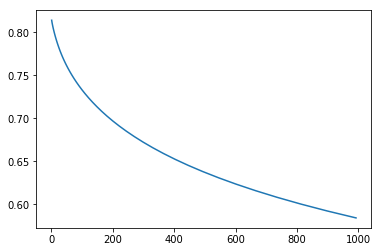

Lasso
alpha =  0.010000000000000004 0.7790112520724575 [array([ 0.00000000e+00, -1.18754169e+00, -7.57446211e-02, -4.77282192e-01,
        1.37567015e-01, -4.55516406e-01,  0.00000000e+00, -3.75385023e-01,
       -3.62814245e-01, -0.00000000e+00, -1.13479821e-01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  6.97959086e-02,  0.00000000e+00,  2.72217124e-01,
        0.00000000e+00,  2.13691384e-01,  1.79853432e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.41979501e-01,  0.00000000e+00,
        0.00000000e+00, -3.04558229e-02, -0.00000000e+00,  0.00000000e+00,
       -8.68593298e-02,  0.00000000e+00, -2.53781836e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.75151984e-02, -0.

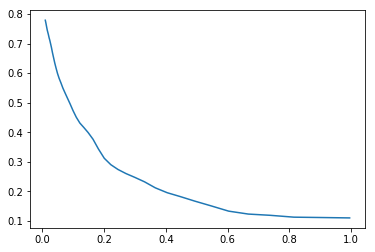

In [26]:
analyse(DataSet = SoundRaw.values, deg = 4, ridge = [1, 1000], lasso = [0.01, 1])
# Warning, который я подавил для Lasso метода:
# ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 
# Fitting data with very small alpha may cause precision problems.